<a href="https://colab.research.google.com/github/tsenga2/keio-senga-seminar/blob/main/fig2_datafull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [15]:
import pandas as pd

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
a1=pd.read_csv('/content/drive/MyDrive/is the us/fig2_datafull.csv',encoding = "cp932")

In [24]:
a1.head()

,決算期,<貸借対照表（資産）>資産合計,<その他項目>設備投資額［累計］,<その他項目>研究開発費［累計］
0,1984/10,93094.0,NaN,NaN
1,1985/10,82267.0,NaN,NaN
2,1986/10,82394.0,NaN,NaN
3,1987/10,85497.0,NaN,NaN
4,1988/03,82382.0,NaN,NaN


In [26]:
a1 = a1.drop(columns={'決算種別'})
a1 = a1.drop(columns={'連結基準'})
a1 = a1.drop(columns={'企業名称'})	
a1 = a1.drop(columns={'日経会社コード'})

KeyError: ignored

In [33]:
a1 = a1.rename(columns={'決算期':'AP'})
a1 = a1.rename(columns={'<貸借対照表（資産）>資産合計':'assets'})
a1 = a1.rename(columns={'<その他項目>設備投資額［累計］':'Capital expenditures'})
a1 = a1.rename(columns={'<その他項目>研究開発費［累計］':'R&D'})

In [35]:
a1.head()

,AP,assets,Capital expenditures,R&D
0,1984/10,93094.0,NaN,NaN
1,1985/10,82267.0,NaN,NaN
2,1986/10,82394.0,NaN,NaN
3,1987/10,85497.0,NaN,NaN
4,1988/03,82382.0,NaN,NaN


In [38]:
a1['fyear'] = a1['AP'].str[:4]
a1['fyear'] = a1['fyear'].astype(int)

In [ ]:
a1.head()

In [41]:
a1 = a1.drop(columns={'AP'})

In [42]:
a1.head()

,assets,Capital expenditures,R&D,fyear
0,93094.0,NaN,NaN,1984
1,82267.0,NaN,NaN,1985
2,82394.0,NaN,NaN,1986
3,85497.0,NaN,NaN,1987
4,82382.0,NaN,NaN,1988


In [43]:
a1["R&D/ASSETS"]=a1["R&D"]/a1["assets"]

In [44]:
a1["Capital expenditures/ASSETS"]=a1["Capital expenditures"]/a1["assets"]

In [45]:
a1.head()

,assets,Capital expenditures,R&D,fyear,R&D/ASSETS,Capital expenditures/ASSETS
0,93094.0,NaN,NaN,1984,NaN,NaN
1,82267.0,NaN,NaN,1985,NaN,NaN
2,82394.0,NaN,NaN,1986,NaN,NaN
3,85497.0,NaN,NaN,1987,NaN,NaN
4,82382.0,NaN,NaN,1988,NaN,NaN


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [48]:
dataone = a1.groupby(['fyear'])[['R&D/ASSETS']]
datatwo = a1.groupby(['fyear'])[['Capital expenditures/ASSETS']]

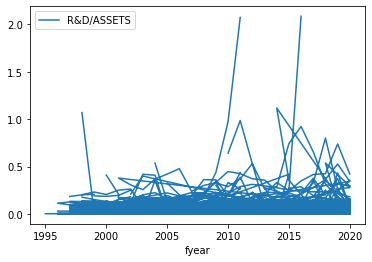

In [50]:
a1.plot('fyear','R&D/ASSETS')

In [52]:
grouped = a1.groupby('fyear').mean()

In [53]:
grouped

,assets,Capital expenditures,R&D,R&D/ASSETS,Capital expenditures/ASSETS
fyear,,,,,
1975,874187.777778,NaN,NaN,NaN,NaN
1976,863715.600000,NaN,NaN,NaN,NaN
1977,974727.703704,NaN,NaN,NaN,NaN
1978,631817.523077,NaN,NaN,NaN,NaN
1979,590186.269231,NaN,NaN,NaN,NaN
1980,659823.273810,NaN,NaN,NaN,NaN
1981,653696.559140,NaN,NaN,NaN,NaN
1982,690264.710000,NaN,NaN,NaN,NaN
1983,617578.350000,NaN,NaN,NaN,NaN


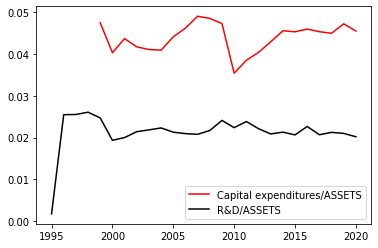

In [61]:
c=list(range(1975,2021))
plt.plot(c, grouped['Capital expenditures/ASSETS'],c='r',label='Capital expenditures/ASSETS')
plt.plot(c, grouped['R&D/ASSETS'],c='k',label='R&D/ASSETS')
plt.legend()